#Machine Learning
##Linear Regression

This tutorial aims to cover the basics of Linear Regression. We will take take one of Scikit-learn dataset use it to build a model.

We will use the Boston Housing dataset that contains information about different houses in boston.

So let's dive into it.

First, we will import all the required Libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Imports the Boston Housing dataset from sklearn
from sklearn.datasets import load_boston

##Analysis of the Boston Dataset

Loading the dataset from sklearn.

Let us load it and print it out so we can see what it contains.

In [ ]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Sklearn returns a Dictionary-like object. The attributes of the dictionary are **data**, **target**, **feature_names**, **DESCR**, and **filename** as seen below.
- **data** - The data to learn.
- **target** - The target value.
- **DESCR** - The description of the dataset.
- **filename** - The location of the dataset
- **feature_names** - This contains a list of all the feature names, names of the independent variables.


In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Lets see what these attributes are,


**DESCR** - The description of the dataset.

In [ ]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

**filename** - The location of the dataset

In [ ]:
boston.filename

'boston_house_prices.csv'

**data** - The data to learn

In [ ]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

**target** - The target values.

In [ ]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

**feature_names** - This contains a list of all the feature names, names of the independent variables.

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

We will now load the data into *pandas dataframe*. Then we print the first 5 rows of the data using **head()**


In [ ]:
boston_data = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see the *target* value (PRICE) is not included in the dataframe. Remember the *target* value is included in the boston data dictionary as *target*. We create a new column of *target* values and add it to the dataframe.Then we print the first 5 rows.


In [ ]:
boston_data['PRICE'] = boston.target
boston_data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using **.isnull()**

In [ ]:
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

To see statistical details of the dataset, we can use describe()


In [ ]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Before creating and training a model it is important to perform some data analysis on the data. In this case we will use some visualisations to understand the relationship of the target variable with other features.

Our first plot will show the distribution of the target variable. We will use the histogram plot function from the matplolib library.

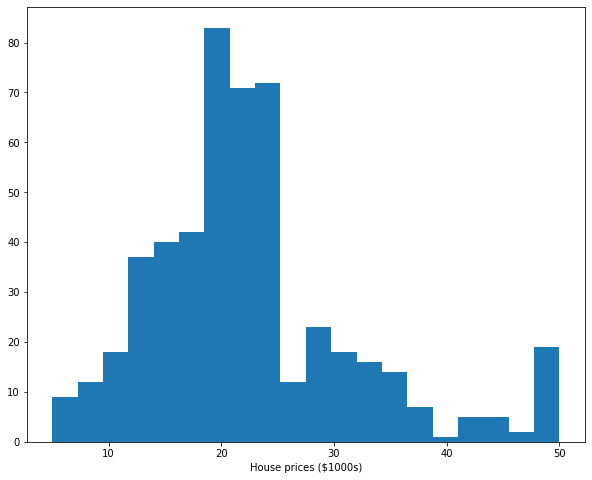

In [ ]:
plt.figure(figsize = (10,8))
plt.hist(boston_data['PRICE'], bins=20)
plt.xlabel("House prices ($1000s)")
plt.show()

We can see from the plot above that the values of **PRICE** for most houses are around 20-24 range (in $1000 scale).

Our next step is to separate our data into *features* and *labels*.

Remember our features are the independent variables(x) while labels are the dependent variables(y). 

In [ ]:
y = boston_data['PRICE']
x = boston_data.drop('PRICE', axis=1)

Let us check the dimension of both x and y

In [ ]:
print(y.shape)
print(x.shape)

(506,)
(506, 13)


Next, we split 80% of the data to the training set while 20% of the data to test set.

The *test_size* variable is where we actually specify the proportion of the test set.

*random_state* variable is used to set the seed for the random generator so that we can ensure that the results that we get can be reproduced

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(x, y, test_size=0.2, random_state = 0)

Let us check the dimension of our train and test data.

In [ ]:
print(train_X.shape)
print(val_X.shape)
print(train_y.shape)
print(val_y.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## Creating and Training the model.

We use scikit-learn's LinearRegression to train our model. Tor this, we instantiate the **LinearRegression** calss and call the **fit()** method along with our training dataset.
<!-- and check the models performance on the test/validation data. -->

In [ ]:
# Creating the Model
model = LinearRegression()

# Training the model.
model.fit(train_X, train_y)


LinearRegression()

In linear regression, the regression model has to find the most optimal coefficients for all the attributes(Independent variable). 
Let us see the coefficients for our model.


In [ ]:
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.119443
ZN,0.044780
INDUS,0.005485
CHAS,2.340804
NOX,-16.123604
RM,3.708709
AGE,-0.003121
DIS,-1.386397
RAD,0.244178
TAX,-0.010990


This means that for a unit increase in **CRIM**, there is a decrease of 0.119 in the value of the Price. Same logic applies to the other attributes.

For testing/validation, we call the **predict()** method on our regressor along with the test data.


In [ ]:
# Testing the model.
predicted_price = model.predict(val_X)

Let us compare the actual outputs for val_y with the predicted values.

In [ ]:
df = pd.DataFrame({'Actual' : val_y, 'Predicted' : predicted_price})
df

,Actual,Predicted
329,22.6,24.889638
371,50.0,23.721411
219,23.0,29.364999
403,8.3,12.122386
78,21.2,21.443823
...,...,...
56,24.7,25.442171
455,14.1,15.571783
60,18.7,17.937195
213,28.1,25.305888


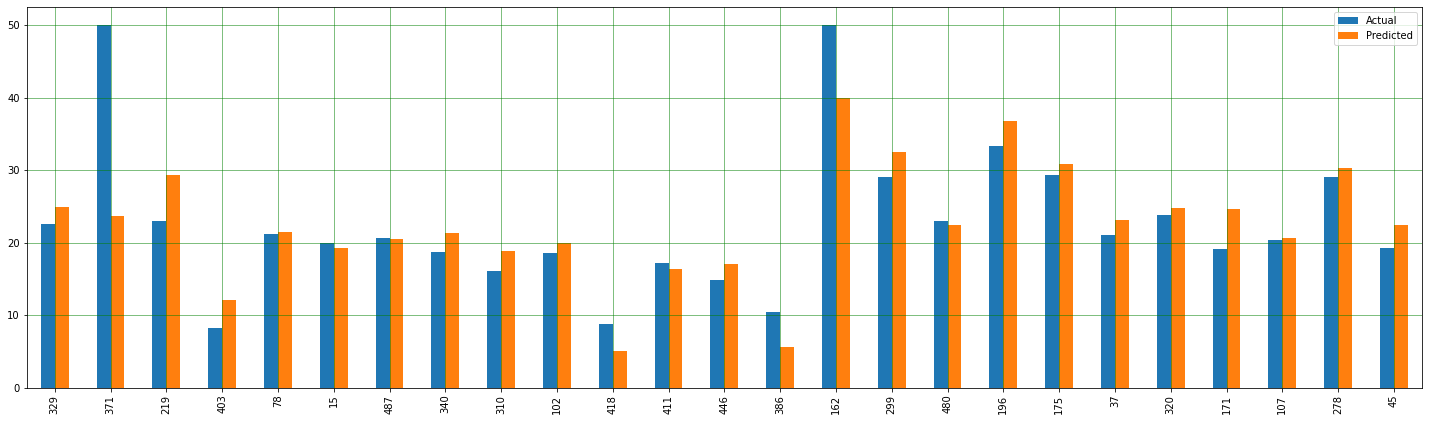

In [ ]:
df = df.head(25)
df.plot(kind='bar',figsize=(25,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

From the plot above we can see that our model is not very accurate, the predictions are close to the actual values. 

The final step is to evaluate the performance of the algorithm. This step is important to compare how well different algorithms perform on a particular dataset. For Regression problems, three common algorithms are used to calculate the error of a model.  **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)** and **Root Mean Squared Error (RMSE)**. The scikit-learn library comes with prebuilt functions to calculate these error values.

In [ ]:
# calculating the Error of the model.

print('The Mean Absolute Error', metrics.mean_absolute_error(val_y, predicted_price))
print('The Mean Squared Error', metrics.mean_squared_error(val_y, predicted_price))
print('The Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(val_y, predicted_price)))

The Mean Absolute Error 3.842909220444498
The Mean Squared Error 33.44897999767638
The Root Mean Squared Error 5.783509315085122


You can see that the value of root mean squared error is 5.78, which is more than 10% of the mean value of the Price i.e. 22.53. This means that our model was not very accurate but can still make reasonably good predictions.


The goal is to minimize your error as much as possible. There are several ways you can improve the model, like using a different regression algorithm(Support Vector Regression (SVR), and regression trees), feature selection, etc.


## **Author - Precious Ijege**